In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import random

In [2]:
df = pd.read_csv("fb_comment_token_annotated.tsv",encoding='utf-8',sep='\t')
df['token_arr'] = df['token'].apply(lambda x:eval(x))
from gensim import models
model = models.Word2Vec.load('../model/fbcomment.w2v')

Using TensorFlow backend.


In [3]:
df['judgeScore'].value_counts()

-1.0     3046
-32.0    3018
 1.0     1493
 0.0     1222
-2.0      484
 2.0      274
-1.5      206
 1.5       90
Name: judgeScore, dtype: int64

In [4]:
df

,commenter_id,commenter_name,created_time,like_count,message,score_0,score_1,score_2,scorerIP_0,scorerIP_1,scorerIP_2,service,token,scoredAmt,agreeNum,judgeScore,token_arr
0,7.288386e+14,Ginnii Masawat,2016-06-03 03:14:40,0.0,"ราคา Sumsung A7 10,490 ตีองซื้อ online หรือ ซื...",2.0,2.0,2.0,::ffff:1.46.96.241,::ffff:1.46.96.241,::ffff:1.46.96.241,DTAC,"['ราคา', ' ', 'Sumsung', ' ', 'A', '7', ' ', '...",3,NaN,2.0,"[ราคา, , Sumsung, , A, 7, , 10, ,, 490, , ..."
1,7.499297e+14,Nuthatai Nund,2016-06-04 15:49:26,1.0,สมัครโปร 79/7 ยังใช้ไม่ถึง 7 วัน ก้อมีข้อควา...,-1.0,-1.0,-1.0,::ffff:1.47.10.153,::ffff:103.5.25.17,::ffff:1.46.206.55,DTAC,"['สมัคร', 'โปร', ' ', '79', '/', '7', ' ', ' '...",3,NaN,-1.0,"[สมัคร, โปร, , 79, /, 7, , , ยัง, ใช้, ไม่,..."
2,5.780900e+14,Nattra Patrasiriya,2016-06-04 07:17:01,2.0,ไม่เห็นจะสมัคร 3gb ต่อสับดาห์ได้,0.0,0.0,-1.0,::ffff:1.46.96.19,::ffff:1.46.96.19,::ffff:171.6.88.73,DTAC,"['ไม่', 'เห็น', 'จะ', 'สมัคร', ' ', ' ', '3', ...",3,NaN,0.0,"[ไม่, เห็น, จะ, สมัคร, , , 3, gb, , ต่อ, สั..."
3,1.254079e+14,นายฮาฮาฮา เอาฮาไปไหน,2016-06-04 07:12:00,0.0,ถึงเม้น ข้างบน\nดีแทค คลื่นดีครับ\nมากๆๆๆๆๆๆๆๆ...,-2.0,-1.0,None,::ffff:1.46.237.140,::ffff:1.47.7.219,None,DTAC,"['ถึงเม้น', ' ', 'ข้าง', 'บน\nดี', 'แทค', ' ',...",2,1.0,-1.5,"[ถึงเม้น, , ข้าง, บน\nดี, แทค, , คลื่น, ดี, ..."
4,1.113488e+15,Pranikorn Ipon,2016-06-04 13:23:22,2.0,แถวบ้าน ขึ้นตัว..E..อยู่เลย,-1.0,-1.0,-1.0,::ffff:1.46.98.55,::ffff:1.46.170.101,::ffff:1.46.98.55,DTAC,"['แถว', 'บ้าน', ' ', 'ขึ้น', 'ตัว', '..', 'E',...",3,NaN,-1.0,"[แถว, บ้าน, , ขึ้น, ตัว, .., E, .., อยู่, เลย]"
5,8.537187e+14,เลิก เล่น,2016-06-06 03:25:11,0.0,เล่นแต่เฟสทำไมถึงคิดเงินเพิ่มคะ ช่วยตอบแชทด้วยค่ะ,0.0,-1.0,-1.0,::ffff:103.5.25.27,::ffff:1.47.194.246,::ffff:1.47.194.246,DTAC,"['เล่น', 'แต่', 'เฟส', 'ทำไม', 'ถึง', 'คิด', '...",3,NaN,-1.0,"[เล่น, แต่, เฟส, ทำไม, ถึง, คิด, เงิน, เพิ่ม, ..."
6,7.512572e+14,Aom Atchara,2016-06-05 02:02:34,2.0,รีบปรับปรุงหน่อยดิ เม้นไม่ค่อยจะตอบเลยนะ ช้าทุ...,0.0,-1.0,-1.0,::ffff:1.47.192.176,::ffff:1.47.7.219,::ffff:1.47.139.95,DTAC,"['รีบ', 'ปรับปรุง', 'หน่อย', 'ดิ', ' ', 'เม้น'...",3,NaN,-1.0,"[รีบ, ปรับปรุง, หน่อย, ดิ, , เม้น, ไม่, ค่อย,..."
7,1.786072e+14,Intarasuk TeRy,2016-06-06 03:29:21,0.0,2100นี่คือโบนัสใช่มั้ยคับช่วยตอบแชทที,1.0,None,None,::ffff:103.5.25.54,None,None,DTAC,"['2100', 'นี่', 'คือ', 'โบนัส', 'ใช่', 'มั้ย',...",1,NaN,1.0,"[2100, นี่, คือ, โบนัส, ใช่, มั้ย, คับ, ช่วย, ..."
8,1.177189e+15,Tookjung Likena,2016-06-06 12:15:29,0.0,ได้ลูกเล็กอ่ะ...,-32.0,-32.0,-32.0,::ffff:1.46.226.139,::ffff:1.46.226.139,::ffff:49.228.219.254,DTAC,"['ได้', 'ลูก', 'เล็ก', 'อ่ะ', '...']",3,NaN,-32.0,"[ได้, ลูก, เล็ก, อ่ะ, ...]"
9,7.724293e+14,Wannapha Kritsuriya,2016-06-06 09:13:24,1.0,ThidTawan Uvichain กินติมกัน,-32.0,-32.0,None,::ffff:1.47.47.15,::ffff:1.47.7.219,None,DTAC,"['ThidTawan', ' ', 'Uvichain', ' ', ' ', 'กินต...",2,2.0,-32.0,"[ThidTawan, , Uvichain, , , กินติม, กัน]"


In [5]:
scored = df[df['judgeScore']!=-32]

In [6]:
k = 800
def getCommentVector(comment,method='sum'):
    commentVec = np.zeros(800)
    for word in comment:
        try:
            commentVec+=model[word]
        except Exception:
            print(".",end='\r')
    if(method=='avg'):
        commentVec/=len(comment)
    return list(commentVec)
X = scored['token_arr'].apply(getCommentVector)
X = np.array([np.array(i) for i in X])
y = (scored['judgeScore']+2)/4

In [7]:
comments =scored['message']

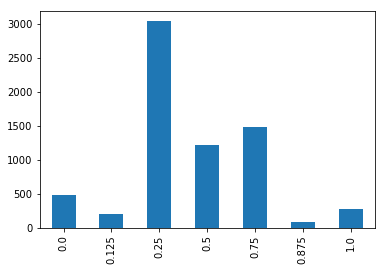

In [8]:
%matplotlib inline
y.value_counts().sort_index().plot('bar')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test ,comment_train,comment_test = train_test_split(X,y.values,comments,test_size=0.2,random_state=42)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#from keras.optimizers import SGD
model = Sequential()
model.add(Dense(600, activation='relu', input_dim=k))
#model.add(Dropout(0.65))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.65))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.60))
model.add(Dense(400, activation='relu'))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.65))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.60))
model.add(Dense(400, activation='relu'))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.65))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.60))
model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.55))
model.add(Dense(1, activation='sigmoid'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.8, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [34]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=32)

Epoch 1/100
5452/5452 [==============================] - 3s - loss: 0.0479     
Epoch 2/100
5452/5452 [==============================] - 3s - loss: 0.0367     
Epoch 3/100
5452/5452 [==============================] - 3s - loss: 0.0340     
Epoch 4/100
5452/5452 [==============================] - 3s - loss: 0.0303     
Epoch 5/100
5452/5452 [==============================] - 3s - loss: 0.0303     
Epoch 6/100
5452/5452 [==============================] - 3s - loss: 0.0262     
Epoch 7/100
5452/5452 [==============================] - 3s - loss: 0.0251     
Epoch 8/100
5452/5452 [==============================] - 3s - loss: 0.0241     
Epoch 9/100
5452/5452 [==============================] - 3s - loss: 0.0241     
Epoch 10/100
5452/5452 [==============================] - 3s - loss: 0.0232     
Epoch 11/100
5452/5452 [==============================] - 3s - loss: 0.0202     
Epoch 12/100
5452/5452 [==============================] - 3s - loss: 0.0193     
Epoch 13/100
5452/5452 [=============

In [46]:
model.save("../model/annRegerssion_done.md")

In [36]:
y_pred = model.predict(X_test)
y_pred

array([[ 0.09393904],
       [ 0.23179273],
       [ 0.99994349],
       ..., 
       [ 0.19260685],
       [ 0.74900466],
       [ 0.6975835 ]], dtype=float32)

In [44]:
correct = 0
for i in range(10):
    ind = random.randint(0,y_pred.shape[0])
    pred_score = y_pred[ind]
    print(comment_test.values[ind])
    if(pred_score<0.45):
        print("Negative!")
        if(y_test[ind]<0.5): correct+=1
    elif(pred_score<0.65):
        print("Neutral")
        if(y_test[ind]==0.5): correct+=1
    else:
        print("Positive!")
        if(y_test[ind]>0.5): correct+=1
    print("Pred: %f , Ans: %f"%(y_pred[ind],y_test[ind]))
print("Acc: %f"%(round((correct/10),2)))

เน็ตช้ามาก
Negative!
Pred: 0.263793 , Ans: 0.250000
สัญญาณ 4G  คลื่นมาขีดเดียว! เน็ตก็ไม่แรงแถมเน็ตหลุดบ่อยมาก อยากให้แก้ไขให้หน่อยครับ
Negative!
Pred: 0.248276 , Ans: 0.250000
บอกยกเลิกข้อความเเล้วมันยังเข้าอีกชั่วโมงเดียวเป็นร้อยๆ ข้อความ
Negative!
Pred: 0.241293 , Ans: 0.250000
ใชโปร888เน็ตเต็มสปีด...ก้อหมุนเหมือนเดิม...เสียความรุ้สึก
Negative!
Pred: 0.239056 , Ans: 0.250000
โพสตนะ แต่ไม่ตอบแชท. แล้วจะมีไปเพื่อ??
Negative!
Pred: 0.218373 , Ans: 0.250000
เมื่อใหร่จะปรับปรุง net คะ? นี่ขนาดอยู่ กทม.-ปริมณฑล ขึ้น 4G แต่หมุนๆๆๆๆๆๆๆๆๆๆๆๆๆๆ หมุนรอบตัวเองอยู่เหรอคะ?  ดูอะไรก็ไม่ได้‼️  ดูวิดิโอ ยูทูป ไม่ได้‼️ คือไรค๊ะ?!! เมื่อใหร่จะทำให้มันดีขึ้น? ไม่รุ้ว่าจะพูดว่าอะไรค่ะ เบื่อ‼️
Negative!
Pred: 0.058599 , Ans: 0.250000
Seสีขาวมีไหม
Positive!
Pred: 0.721830 , Ans: 0.750000
ถ้าใช้รายเดือนอยุ่แล้ว อยากจะได้เครื่องj2 ฟรีต้องทำไงคับ
Positive!
Pred: 0.721999 , Ans: 0.750000
เชิญชวนพ่อแม่พี่น้อง. เลิกใช้เครื่อข่ายนี้ เถอะครับ.      ฉ้อโกง.  บอกมีข้อความเข้ามาหาผม. ซึ่งผมไม่ได้ สมัคร อะไรซักนิด.  

In [38]:
y_pred_label = y_pred.copy()
y_pred_label[y_pred_label<0.45] = 0
y_pred_label[(y_pred_label>=0.45)&(y_pred_label<=0.65)] = 0.5
y_pred_label[y_pred_label>0.65] = 1
y_pred_label.transpose()

array([[ 0.,  0.,  1., ...,  0.,  1.,  1.]], dtype=float32)

In [39]:
y_test_label = y_test.copy()
y_test_label[y_test_label<0.45] = 0
y_test_label[(y_test_label>=0.45)&(y_test_label<=0.65)] = 0.5
y_test_label[y_test_label>0.65] = 1
y_test_label

array([ 0.,  0.,  1., ...,  0.,  1.,  1.])

In [45]:
correct = 0
for i in range(y_test_label.shape[0]):
    if(y_test_label[i]==y_pred_label[i]):correct+=1
        
correct/y_test_label.shape[0]

0.7021276595744681